In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime
import os
import importlib
from IPython.display import Audio

os.chdir("..")
import context
context.get()

import baseMethods
importlib.reload(baseMethods)

import magSonify
from magSonify import SimulateData

## Notes

WSOLA is impressive at reproducing the frequency spectra when stretching sine waves and harmonics. Evidently, its weaknesses lie in reproducing signals with rapidly time varying features.

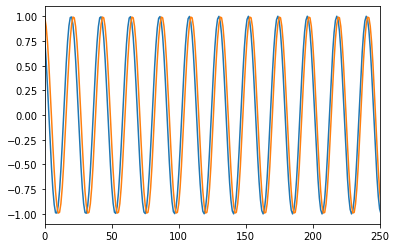

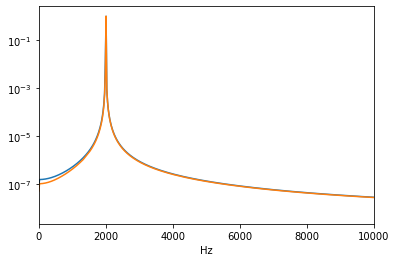

In [13]:
stretch = 16
freq = 2000
expect,after = baseMethods.compare_Sine('wsolaStretch',freq,stretch)
def myDisplay(expect,after,xRange=[0,10000],timeGraphXshift = 0,frontEndCut = 2500,timeGraphSamples=250):
    expect = expect[frontEndCut:]
    after = after[frontEndCut:]
    expect.normalise()
    after.normalise()
    plt.plot(expect.x)
    plt.plot(after.x)
    plt.xlim(np.array([0,timeGraphSamples])+timeGraphXshift)
    plt.show()
    baseMethods.plotPSD(expect,after,showPlot=False)
    plt.xlim(xRange)
    return expect, after
expect,after = myDisplay(expect,after)
plt.show()

In [3]:
Audio(expect.x,rate=44100)

In [4]:
Audio(after.x,rate=44100)

I found it interesting to note that in this case WSOLA matched the waveform exactly, while other algorithms like the phase vocoder would match the PSD but not the waveform.

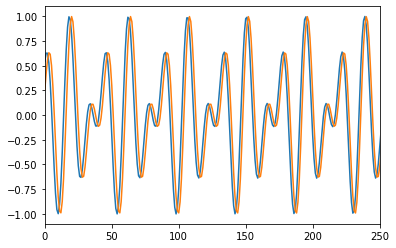

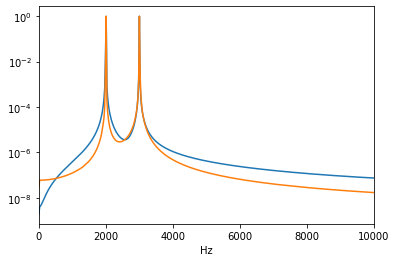

In [5]:
freqs = (2000,3000)
expect,after = baseMethods.compare_Harmonic('wsolaStretch',freqs,stretch)
expect,after = myDisplay(expect,after)
plt.show()

In [6]:
Audio(expect.x,rate=44100)

In [7]:
Audio(after.x,rate=44100)

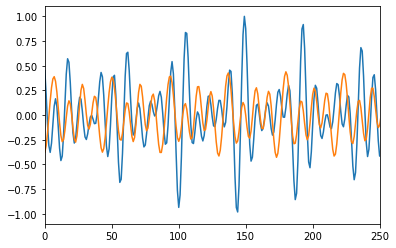

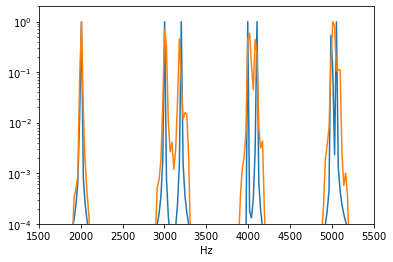

In [10]:
freqs = (2000,3000,3200,4000,4100,5000,5050)
expect,after = baseMethods.compare_Harmonic('wsolaStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[1500,5500])
plt.ylim([1e-4,2])
plt.show()

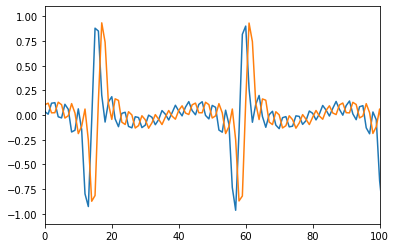

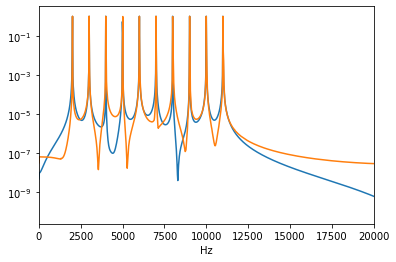

In [16]:
freqs = (2000,3000,4000,5000,6000,7000,8000,9000,10000,11000)
expect,after = baseMethods.compare_Harmonic('wsolaStretch',freqs,stretch)
expect,after = myDisplay(expect,after,xRange=[0,20000],timeGraphSamples=100)
plt.show()